Data: https://www.kaggle.com/cnic92/spotify-past-decades-songs-50s10s <br>

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

def read_clean_data(filename):
    d = pd.read_csv(filename)[['bpm', 'nrgy', 'dnce', 'dB', 'val', 'acous', 'spch']]
    d = d.rename({'bpm':'tempo','nrgy':'energy','dnce':'danceability','dB':'loudness',
                  'val':'valence','acous':'acousticness','spch':'speechiness'},
                 axis = 1)
    d['decade'] = filename[2:4] + 's'
    return d

### 1

In [22]:
filenames = ['1950.csv','1980.csv','2010.csv']

df = pd.concat([read_clean_data(i) for i in filenames])

In [23]:
df.groupby('decade').mean()

,tempo,energy,danceability,loudness,valence,acousticness,speechiness
decade,,,,,,,
10s,118.720000,67.980000,65.370000,-5.490000,46.350000,14.710000,8.440000
50s,111.150685,34.890411,51.027397,-11.616438,57.589041,73.013699,4.191781
80s,122.609524,64.895238,62.276190,-9.095238,63.123810,24.571429,4.419048


<AxesSubplot:xlabel='decade'>

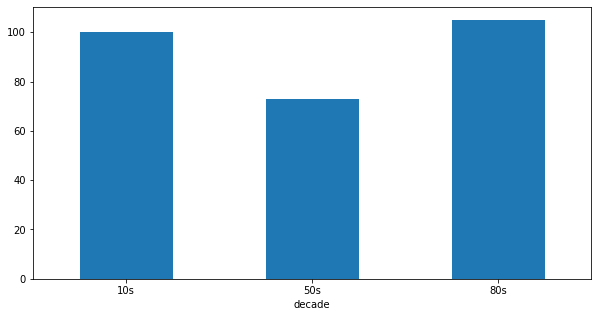

In [24]:
df.groupby('decade')['tempo'].count().plot.bar(rot = 0, figsize = (10, 5))

## PCA

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def plot_pca(x_pca, exvar):    
    pc1 = str(100*round(exvar[0], 2))
    pc2 = str(100*round(exvar[1], 2))
    
    fig = plt.figure(figsize=(20, 9))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel("Principal Component 1 " + pc1 + "%") 
    ax.set_ylabel("Principal Component 2 " + pc2 + "%") 
    ax.set_title("2 component PCA") 
    targets = ['50s',  '80s', '10s']
    colors = ['tab:blue', 'tab:orange', 'tab:green',]
    for target, color in zip(targets,colors):
        indicesToKeep = x_pca['key'] == target
        ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
                   , x_pca.loc[indicesToKeep, 'PC2']
                   , c = color
                   , s = 200
                   , alpha = 0.5)
    ax.legend(targets)
    ax.grid()
    
def do_pca(df, standartize = False):
    x = df.loc[:, df.columns[:-1]].values
    y = df.loc[:,['decade']].values
    if standartize:
        x = StandardScaler().fit_transform(x)
    x = pd.DataFrame(x)

    pca = PCA()
    x_pca = pca.fit_transform(x)
    x_pca = pd.DataFrame(x_pca)

    exvar = pca.explained_variance_ratio_
    pd.DataFrame(
        {"explained":exvar, "PCA":["PCA"+str(i) for i in range(1, len(exvar)+1)]}
    ).plot.bar(x = 'PCA', y = 'explained', figsize = (10, 6))
    
    x_pca['key']= y
    x_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','key']
    x_pca.head()
    
    plot_pca(x_pca, exvar)

#### not standartized

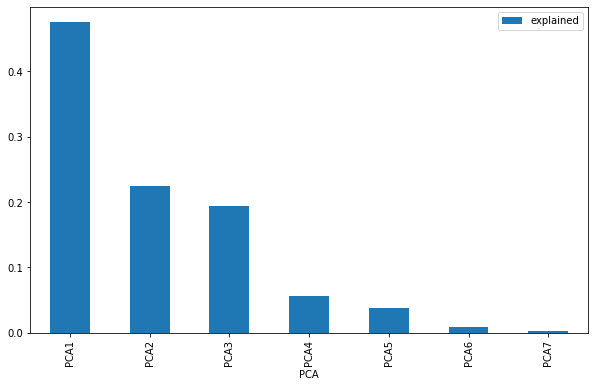

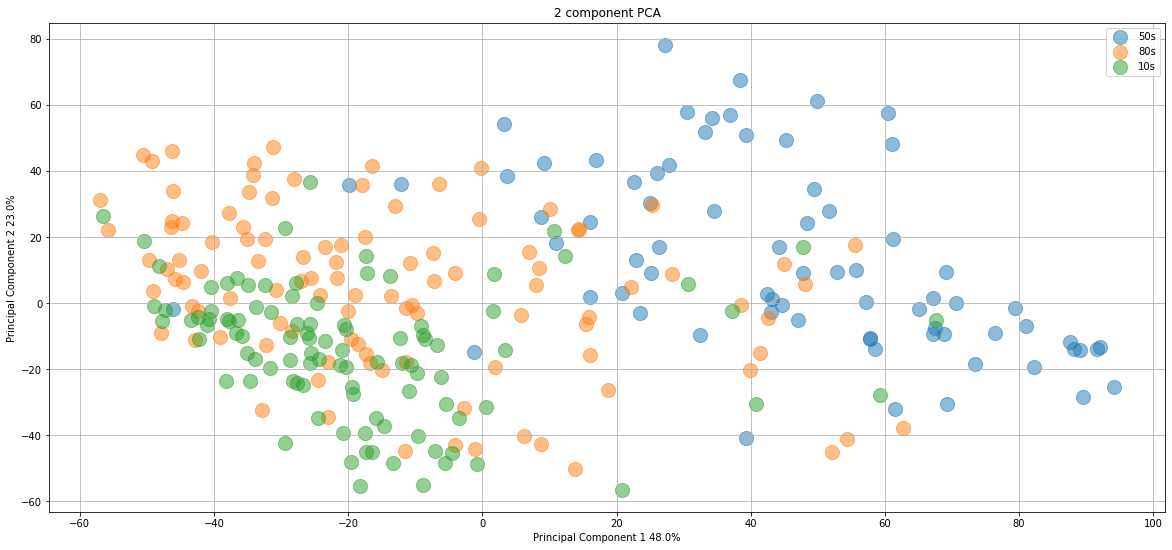

In [8]:
do_pca(df, False)

#### standartized

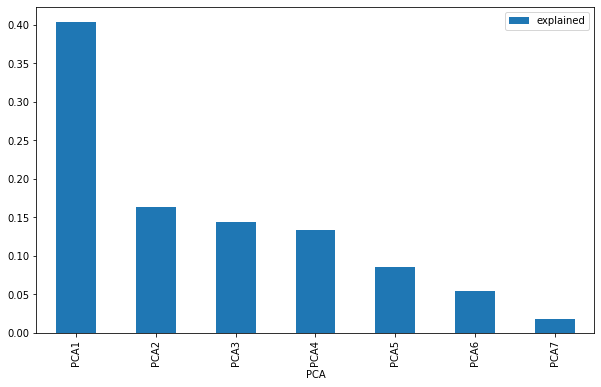

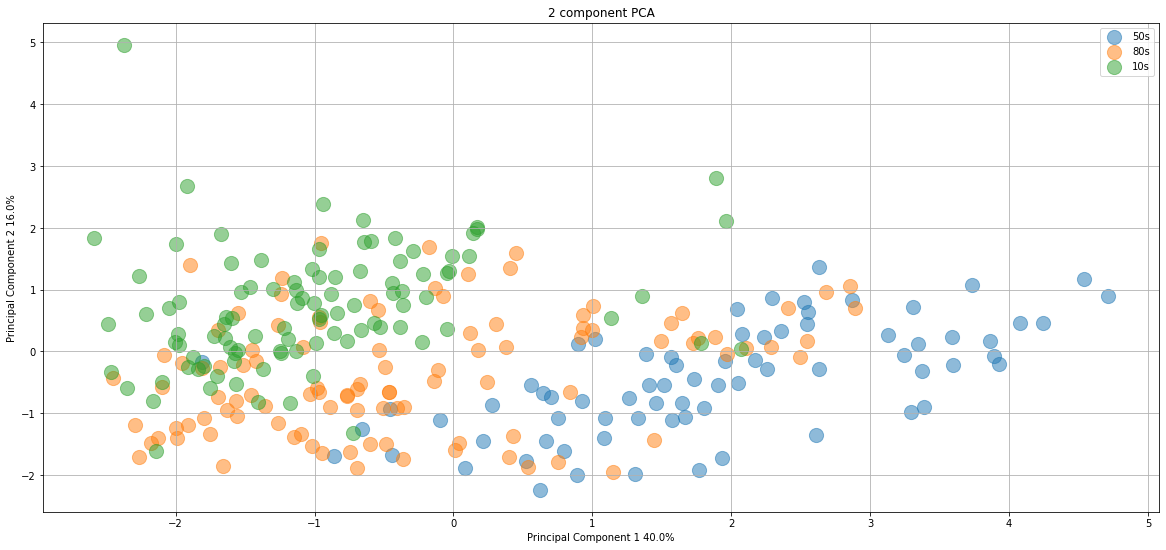

In [11]:
do_pca(df, True)

## MDS

In [20]:
import plotly.express as px 
from sklearn.manifold import MDS 

def plot_mds(df):
    fig = plt.figure(figsize=(20, 9))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel("Principal Component 1 ") 
    ax.set_ylabel("Principal Component 2 ") 
    ax.set_title("2 component PCA") 
    targets = ['50s',  '80s', '10s']
    colors = ['b', 'g', 'r',]
    for target, color in zip(targets,colors):
        indicesToKeep = df['key'] == target
        ax.scatter(df.loc[indicesToKeep, 'PC1']
                    , df.loc[indicesToKeep, 'PC2']
                    , c = color
                    , s = 200
                    , alpha = 0.4)
    ax.legend(targets)
    ax.grid()
    
def do_mds(df, standartize = False):
    model2d=MDS(n_components=2, 
          metric=True, 
          n_init=4, 
          max_iter=1000, 
          verbose=0, 
          eps=0.001, 
          n_jobs=None, 
          random_state=42, 
          dissimilarity='euclidean')
    
    x = df.loc[:, df.columns[:-1]].values
    y = df.loc[:,['decade']].values
    if standartize:
        x = StandardScaler().fit_transform(x)
    x = pd.DataFrame(x)
    
    X_trans = model2d.fit_transform(x)

    print('Iterations: ', model2d.n_iter_)
    print('Stress: ', model2d.stress_)
    
    X_trans = X_trans.reshape(2, -1)
    y = y.flatten()
    toplot = pd.DataFrame({"PC1":x[0],"PC2":x[1],"key":y})
    
    plot_mds(toplot)

#### not standartized

Iterations:  170
Stress:  8468357.90473324


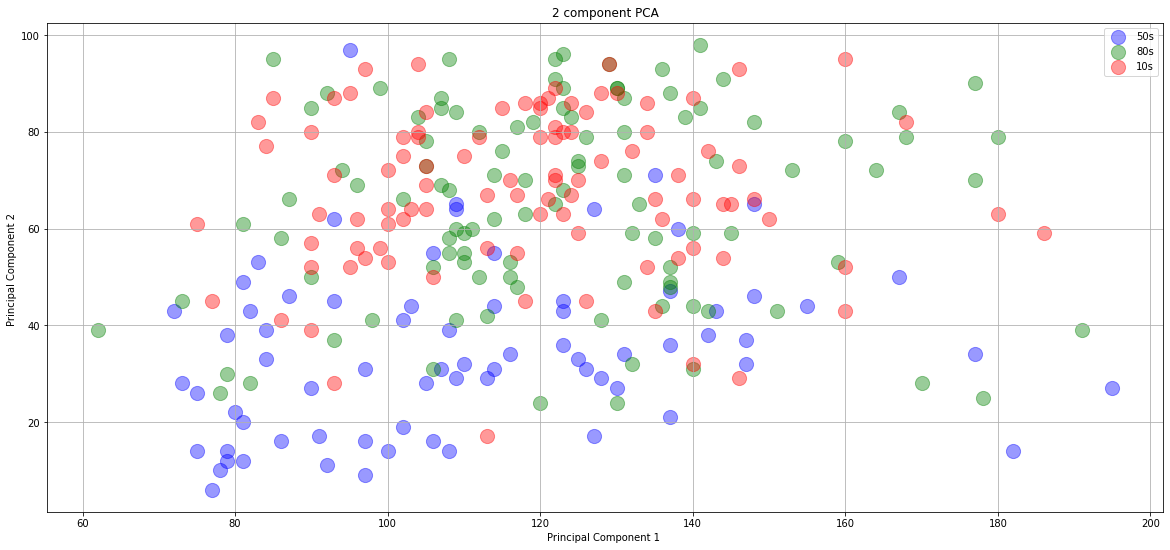

In [21]:
do_mds(df, False)

#### standartized

Iterations:  271
Stress:  23834.83721900761


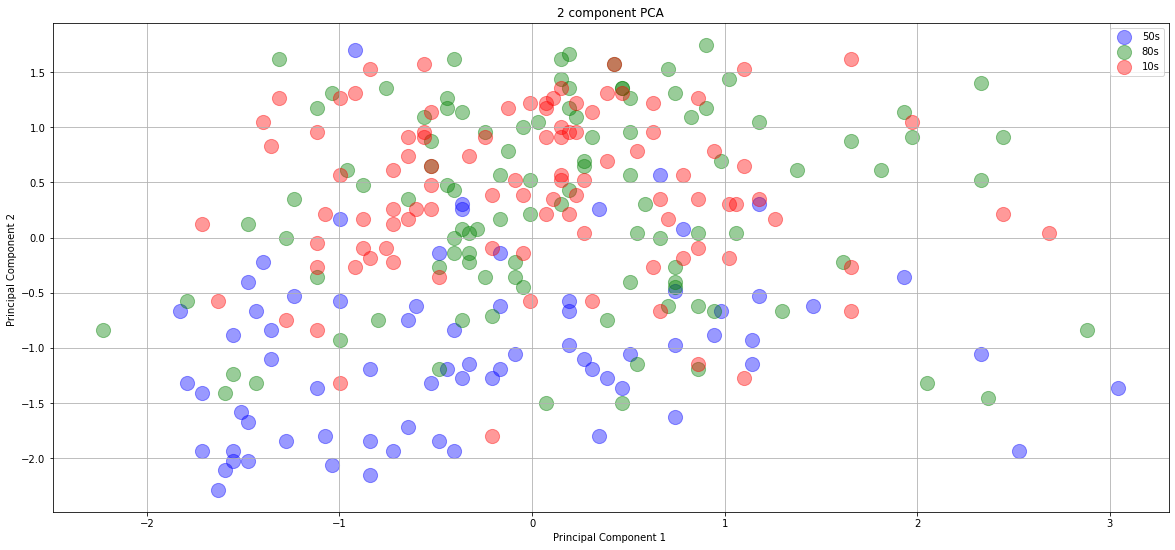

In [22]:
do_mds(df, True)